In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Function definitions
color_dict = {
    1: 'darkorange',
    2: 'mediumturquoise',
    3: 'darkorchid',
    4: 'cornflowerblue',
    5: 'firebrick',
    6: 'mediumseagreen'
}

def plot_lclock_vs_systime(df1, df2, df3, cspeed1, cspeed2, cspeed3, trialNum):
    '''Plot Logical Clock Time vs System Time'''
    plt.figure(figsize=(15, 5))
    plt.title(f'Logical Clock Time vs System Time (unix timestamp), {trialNum}')
    plt.xlabel('System Time (unix timestamp)')
    plt.ylabel('Logical Clock Time')
    plt.plot(df1['system_time'], df1['logical_clock_time'], c=color_dict[2], label=f'Machine 0, Clock Speed {cspeed1}', alpha=0.6)
    # plt.plot(m0_t1_c2[m0_t1_c2['message_received']==1]['system_time'], m0_t1_c2[m0_t1_c2['message_received']==1]['logical_clock_time'], 'o-', c=color_dict[2])
    plt.plot(df2['system_time'], df2['logical_clock_time'], c=color_dict[4], label=f'Machine 1, Clock Speed {cspeed2}', alpha=0.6)
    # plt.plot(m1_t1_c4[m1_t1_c4['message_received']==1]['system_time'], m1_t1_c4[m1_t1_c4['message_received']==1]['logical_clock_time'], '-o', c=color_dict[4])
    plt.plot(df3['system_time'], df3['logical_clock_time'], c=color_dict[5], label=f'Machine 2, Clock Speed {cspeed3}', alpha=0.6)
    plt.legend(loc='upper left')
    plt.show()

def plot_lclock_deltas(df1, df2, df3, cspeed1, cspeed2, cspeed3, trialNum):
    '''Plot Deltas in Logical Clock from One Clock Tick to the Next'''
    logical_clock_delta_m0 = df1['logical_clock_time'].diff(1)
    logical_clock_delta_m1 = df2['logical_clock_time'].diff(1)
    logical_clock_delta_m2 = df3['logical_clock_time'].diff(1)

    max_delta = int(max(logical_clock_delta_m0.max(), logical_clock_delta_m1.max(), logical_clock_delta_m2.max()))

    plt.figure(figsize=(10, 5))
    plt.title(f'Change in Logical Clock Between Consecutive Clock Ticks, Trial {trialNum}')
    plt.xlabel('System Time (unix timestamp)')
    plt.ylabel('Logial Clock Value Delta')

    plt.ylim([0, max_delta+(max_delta//2)])
    plt.yticks(np.arange(0, max_delta+(max_delta//2)+1, step=5))
    plt.plot(df1['system_time'], logical_clock_delta_m0, 'o-', c=color_dict[2], label=f'Machine 0, Clock Speed {cspeed1}', alpha=0.3)
    plt.plot(df2['system_time'], logical_clock_delta_m1, '^-', c=color_dict[4], label=f'Machine 1, Clock Speed {cspeed2}', alpha=0.3)
    plt.plot(df3['system_time'], logical_clock_delta_m2, 'v-', c=color_dict[5], label=f'Machine 2, Clock Speed {cspeed3}', alpha=0.3)
    plt.legend(loc='upper left')
    plt.show()

def plotQueueLengths(trial_df0, trial_df1, trial_df2, speed0, speed1, speed2, trial_num):
    plt.figure(figsize=(10,5))
    plt.title("Queue Lengths per Thread in Trial " + str(trial_num))
    plt.xlabel("System Time (unix timestamp)")
    plt.ylabel("Queue Length (messages)")
    plt.yticks(np.arange(0, 1.5*max(max(trial_df0['length_of_queue']), max(trial_df1['length_of_queue']), max(trial_df2['length_of_queue'])), step=1))
    plt.plot(trial_df0['system_time'], trial_df0['length_of_queue'], 'o-', label=f'Machine 0, Clock Speed {speed0}', c=color_dict[2], alpha=0.3)
    plt.plot(trial_df1['system_time'], trial_df1['length_of_queue'], '^-', label=f'Machine 1, Clock Speed {speed1}', c=color_dict[4], alpha=0.3)
    plt.plot(trial_df2['system_time'], trial_df2['length_of_queue'], 'v-', label=f'Machine 2, Clock Speed {speed2}', c=color_dict[5], alpha=0.3)
    plt.legend(loc='upper left')
    plt.show()


In [49]:
# Reading data for baseline trials
t1_m0_c6 = pd.read_csv('./baselineTrials/trial1/machine0clock_speed6log.csv')
t1_m1_c1 = pd.read_csv('./baselineTrials/trial1/machine1clock_speed1log.csv')
t1_m2_c3 = pd.read_csv('./baselineTrials/trial1/machine2clock_speed3log.csv')

t2_m0_c6 = pd.read_csv('./baselineTrials/trial2/machine0clock_speed6log.csv')
t2_m1_c3 = pd.read_csv('./baselineTrials/trial2/machine1clock_speed3log.csv')
t2_m2_c4 = pd.read_csv('./baselineTrials/trial2/machine2clock_speed4log.csv')

t3_m0_c3 = pd.read_csv('./baselineTrials/trial3/machine0clock_speed3log.csv')
t3_m1_c2 = pd.read_csv('./baselineTrials/trial3/machine1clock_speed2log.csv')
t3_m2_c4 = pd.read_csv('./baselineTrials/trial3/machine2clock_speed4log.csv')

t4_m0_c4 = pd.read_csv('./baselineTrials/trial4/machine0clock_speed4log.csv')
t4_m1_c5 = pd.read_csv('./baselineTrials/trial4/machine1clock_speed5log.csv')
t4_m2_c2 = pd.read_csv('./baselineTrials/trial4/machine2clock_speed2log.csv')

t5_m0_c1 = pd.read_csv('./baselineTrials/trial5/machine0clock_speed1log.csv')
t5_m1_c4 = pd.read_csv('./baselineTrials/trial5/machine1clock_speed4log.csv')
t5_m2_c2 = pd.read_csv('./baselineTrials/trial5/machine2clock_speed2log.csv')

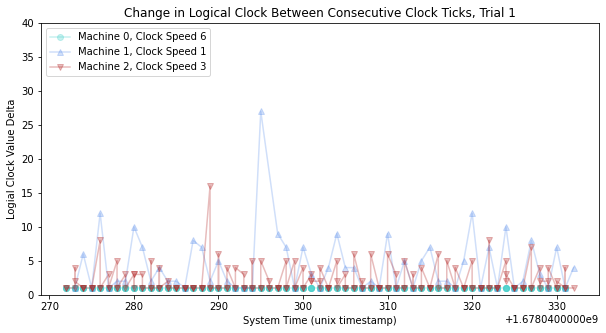

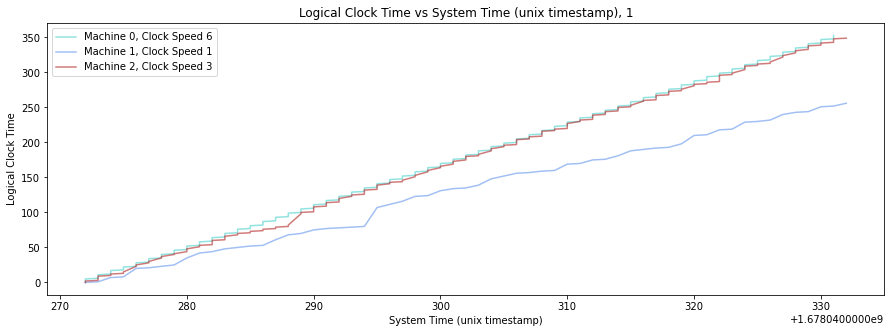

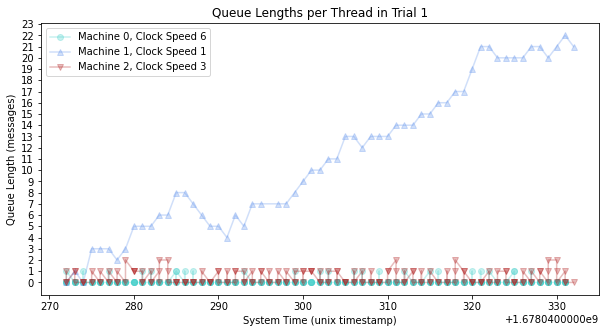

In [50]:
# Plotting for baseline trials

plot_lclock_deltas(t1_m0_c6, t1_m1_c1, t1_m2_c3, 6, 1, 3, 1)
plot_lclock_vs_systime(t1_m0_c6, t1_m1_c1, t1_m2_c3, 6, 1, 3, 1)
plotQueueLengths(t1_m0_c6, t1_m1_c1, t1_m2_c3, 6, 1, 3, 1)

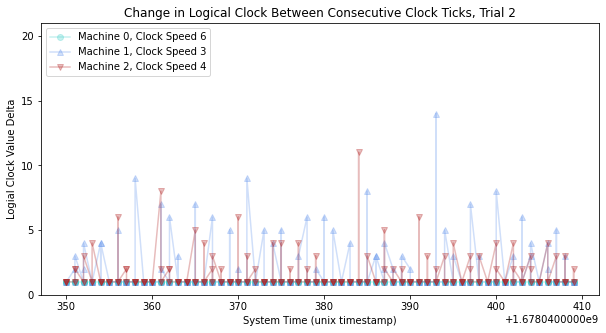

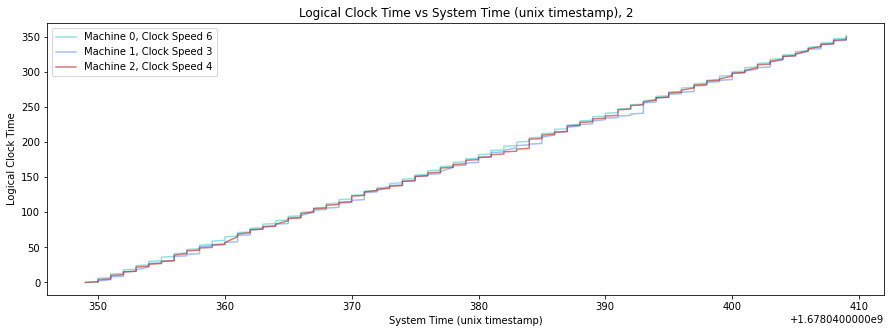

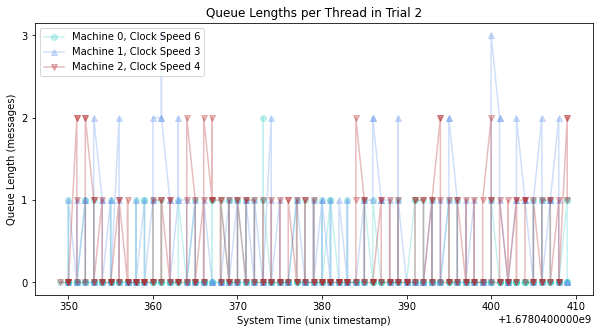

In [51]:
plot_lclock_deltas(t2_m0_c6, t2_m1_c3, t2_m2_c4, 6, 3, 4, 2)
plot_lclock_vs_systime(t2_m0_c6, t2_m1_c3, t2_m2_c4, 6, 3, 4, 2)
plotQueueLengths(t2_m0_c6, t2_m1_c3, t2_m2_c4, 6, 3, 4, 2)

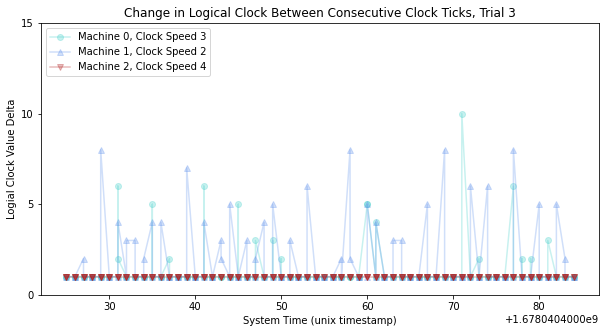

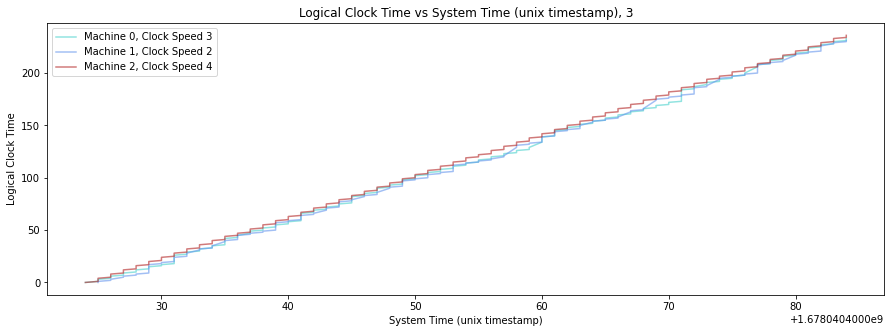

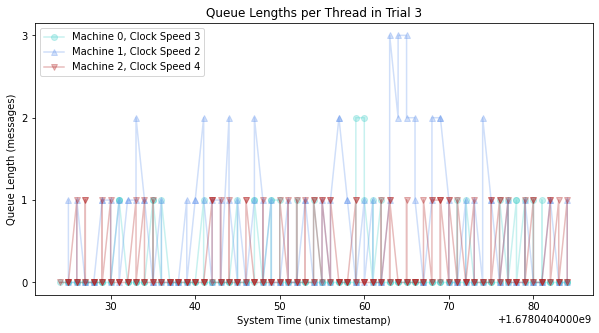

In [52]:
plot_lclock_deltas(t3_m0_c3, t3_m1_c2, t3_m2_c4, 3, 2, 4, 3)
plot_lclock_vs_systime(t3_m0_c3, t3_m1_c2, t3_m2_c4, 3, 2, 4, 3)
plotQueueLengths(t3_m0_c3, t3_m1_c2, t3_m2_c4, 3, 2, 4, 3)

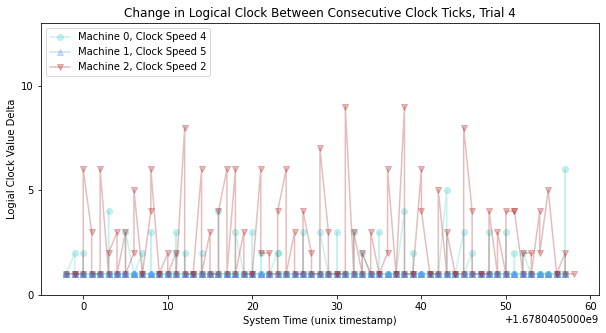

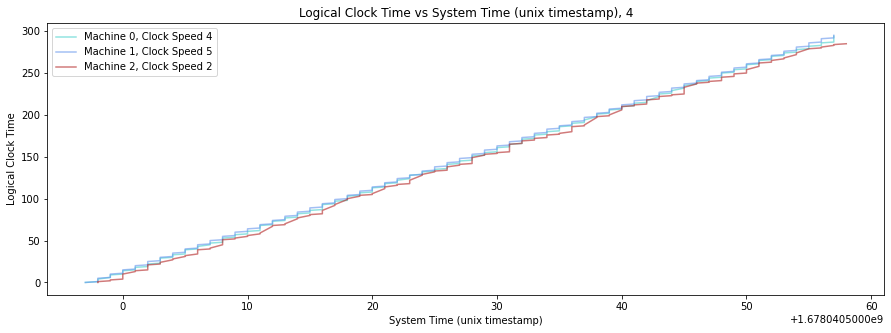

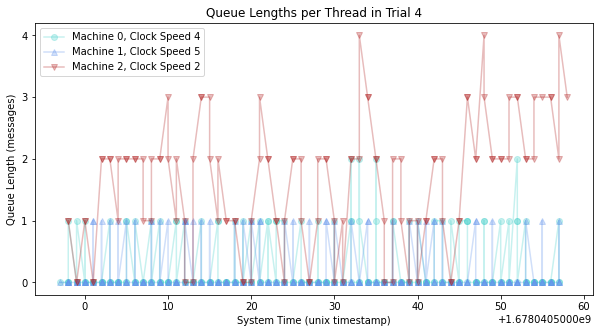

In [53]:
plot_lclock_deltas(t4_m0_c4, t4_m1_c5, t4_m2_c2, 4, 5, 2, 4)
plot_lclock_vs_systime(t4_m0_c4, t4_m1_c5, t4_m2_c2, 4, 5, 2, 4)
plotQueueLengths(t4_m0_c4, t4_m1_c5, t4_m2_c2, 4, 5, 2, 4)

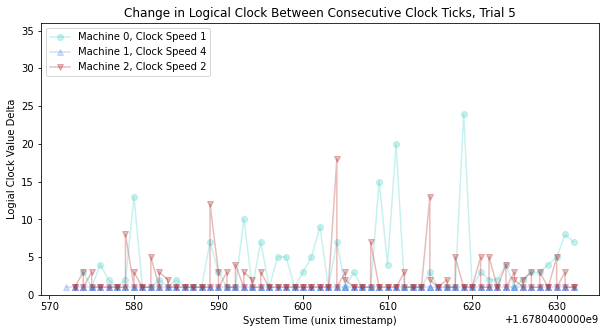

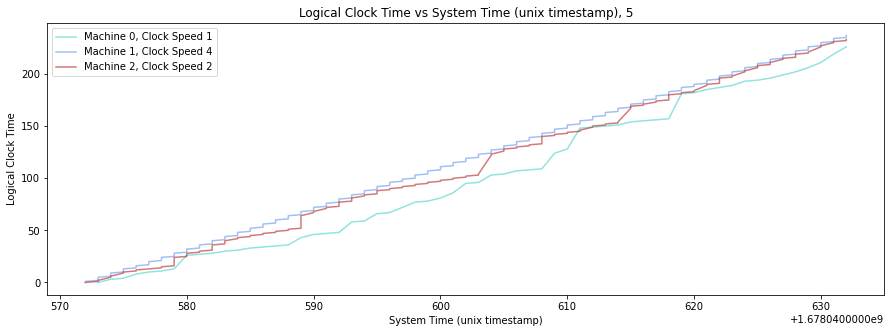

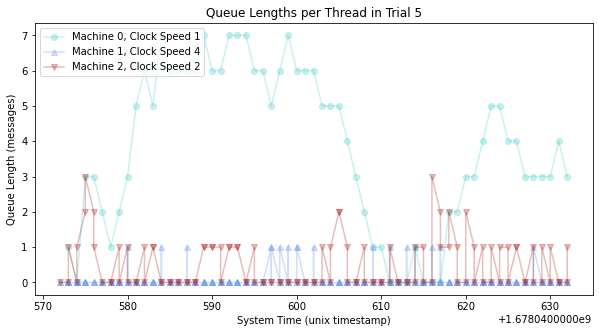

In [54]:
plot_lclock_deltas(t5_m0_c1, t5_m1_c4, t5_m2_c2, 1, 4, 2, 5)
plot_lclock_vs_systime(t5_m0_c1, t5_m1_c4, t5_m2_c2, 1, 4, 2, 5)
plotQueueLengths(t5_m0_c1, t5_m1_c4, t5_m2_c2, 1, 4, 2, 5)

In [9]:
# Reading data for higher send probability trials
hp_t1_m0_c4 = pd.read_csv('./higherSendProbabilityTrials/trial1/machine0clock_speed4log.csv')
hp_t1_m1_c3 = pd.read_csv('./higherSendProbabilityTrials/trial1/machine1clock_speed3log.csv')
hp_t1_m2_c3 = pd.read_csv('./higherSendProbabilityTrials/trial1/machine2clock_speed3log.csv')

hp_t2_m0_c2 = pd.read_csv('./higherSendProbabilityTrials/trial2/machine0clock_speed2log.csv')
hp_t2_m1_c2 = pd.read_csv('./higherSendProbabilityTrials/trial2/machine1clock_speed2log.csv')
hp_t2_m2_c3 = pd.read_csv('./higherSendProbabilityTrials/trial2/machine2clock_speed3log.csv')

hp_t3_m0_c4 = pd.read_csv('./higherSendProbabilityTrials/trial3/machine0clock_speed4log.csv')
hp_t3_m1_c2 = pd.read_csv('./higherSendProbabilityTrials/trial3/machine1clock_speed2log.csv')
hp_t3_m2_c2 = pd.read_csv('./higherSendProbabilityTrials/trial3/machine2clock_speed2log.csv')

hp_t4_m0_c5 = pd.read_csv('./higherSendProbabilityTrials/trial4/machine0clock_speed5log.csv')
hp_t4_m1_c6 = pd.read_csv('./higherSendProbabilityTrials/trial4/machine1clock_speed6log.csv')
hp_t4_m2_c5 = pd.read_csv('./higherSendProbabilityTrials/trial4/machine2clock_speed5log.csv')

hp_t5_m0_c1 = pd.read_csv('./higherSendProbabilityTrials/trial5/machine0clock_speed1log.csv')
hp_t5_m1_c3 = pd.read_csv('./higherSendProbabilityTrials/trial5/machine1clock_speed3log.csv')
hp_t5_m2_c2 = pd.read_csv('./higherSendProbabilityTrials/trial5/machine2clock_speed2log.csv')

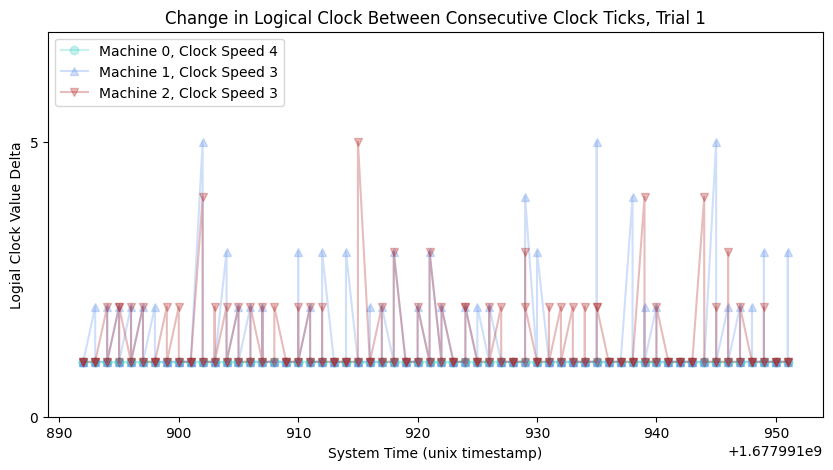

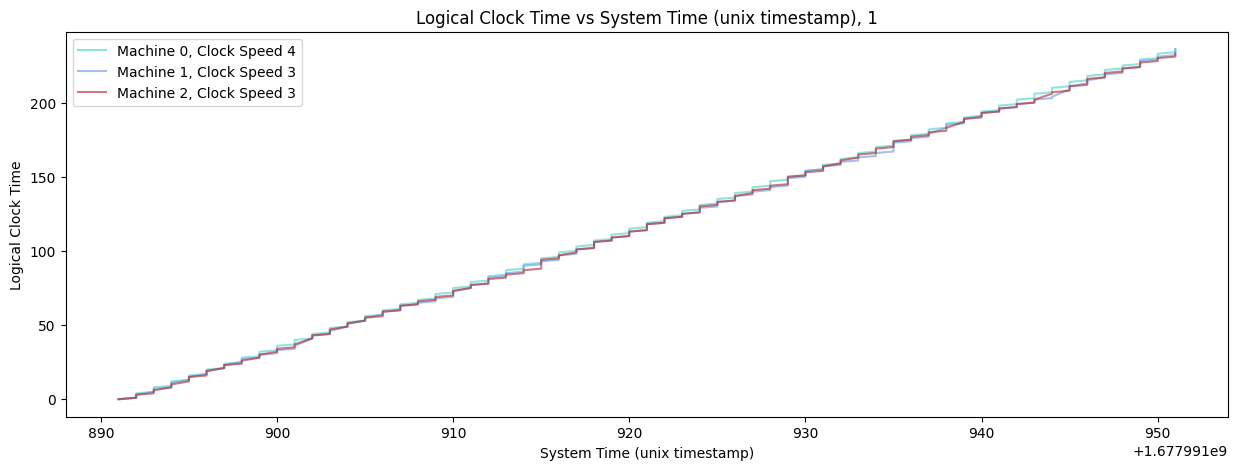

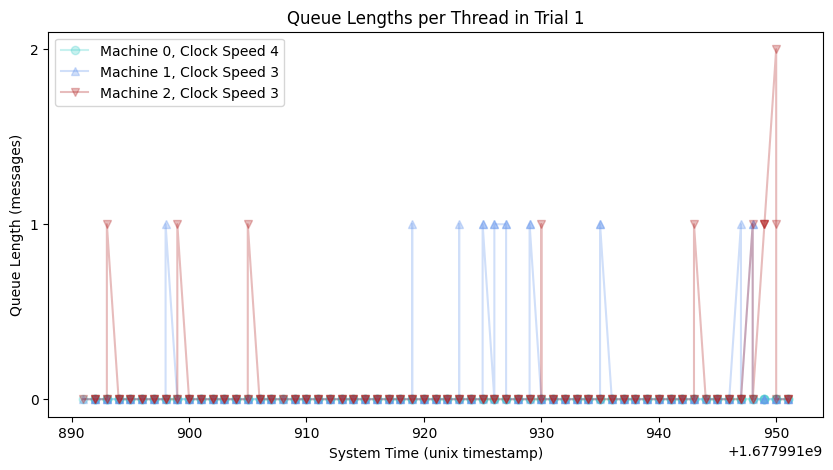

In [10]:
plot_lclock_deltas(hp_t1_m0_c4, hp_t1_m1_c3, hp_t1_m2_c3, 4, 3, 3, 1)
plot_lclock_vs_systime(hp_t1_m0_c4, hp_t1_m1_c3, hp_t1_m2_c3, 4, 3, 3, 1)
plotQueueLengths(hp_t1_m0_c4, hp_t1_m1_c3, hp_t1_m2_c3, 4, 3, 3, 1)

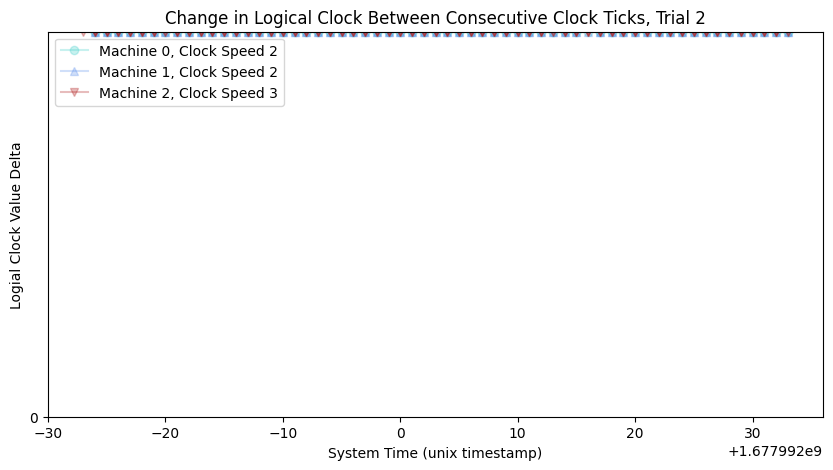

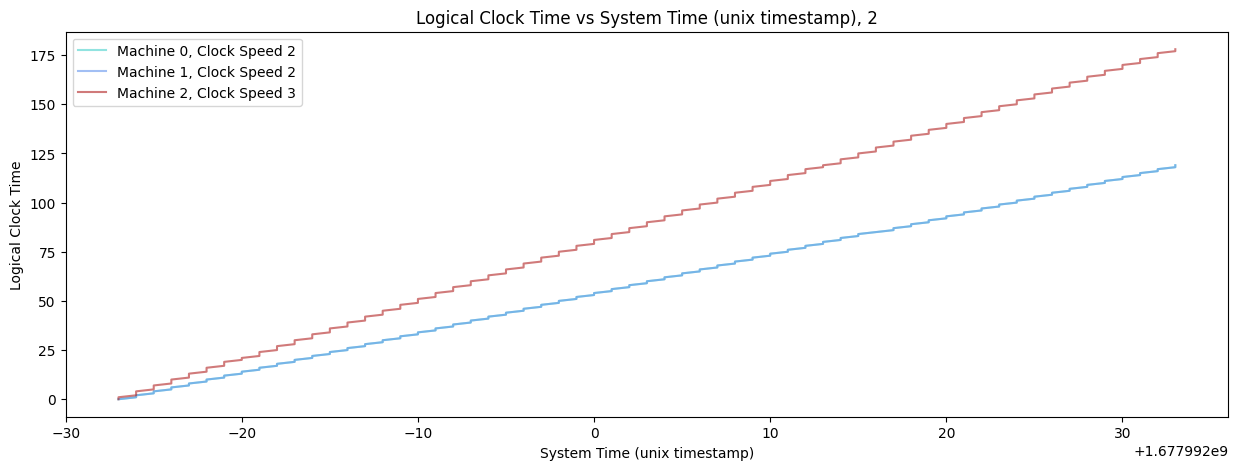

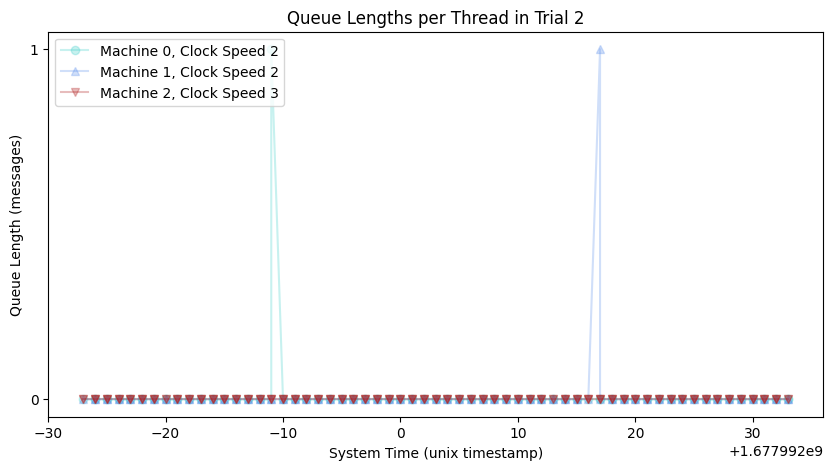

In [11]:
plot_lclock_deltas(hp_t2_m0_c2, hp_t2_m1_c2, hp_t2_m2_c3, 2, 2, 3, 2)
plot_lclock_vs_systime(hp_t2_m0_c2, hp_t2_m1_c2, hp_t2_m2_c3, 2, 2, 3, 2)
plotQueueLengths(hp_t2_m0_c2, hp_t2_m1_c2, hp_t2_m2_c3, 2, 2, 3, 2)

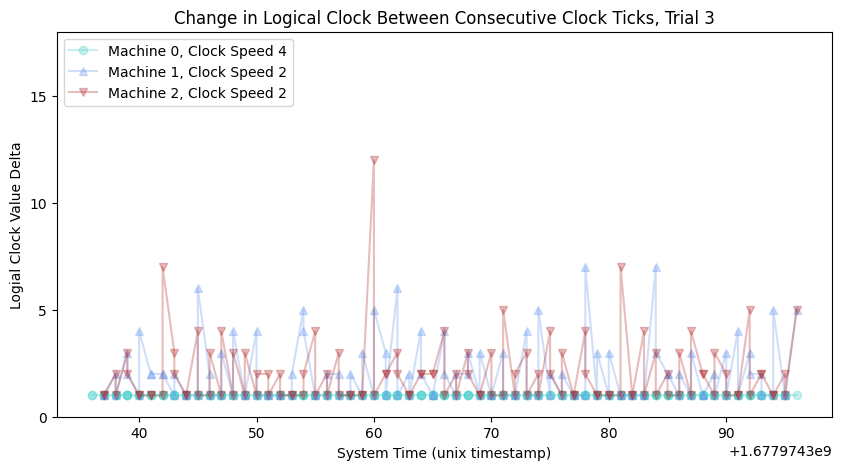

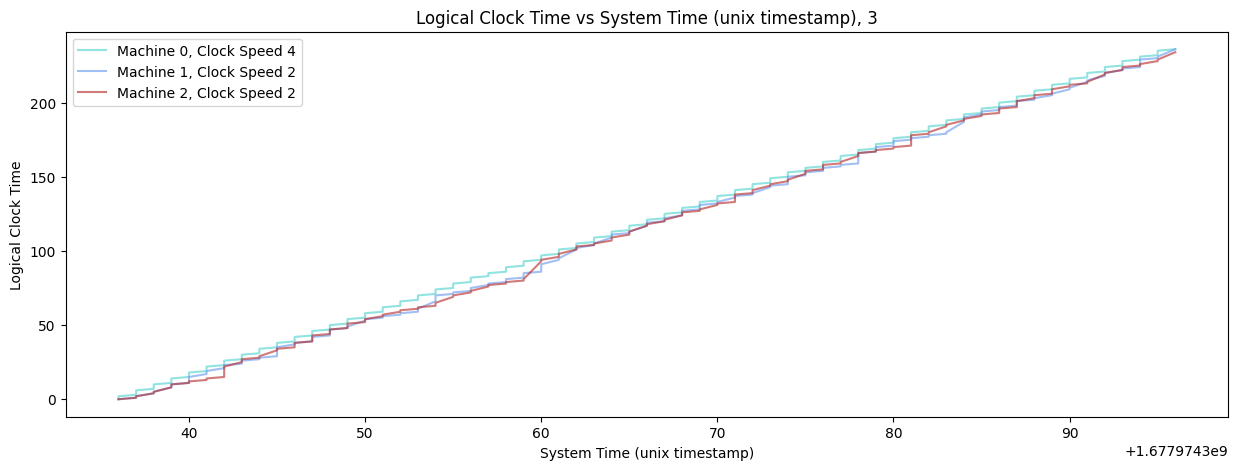

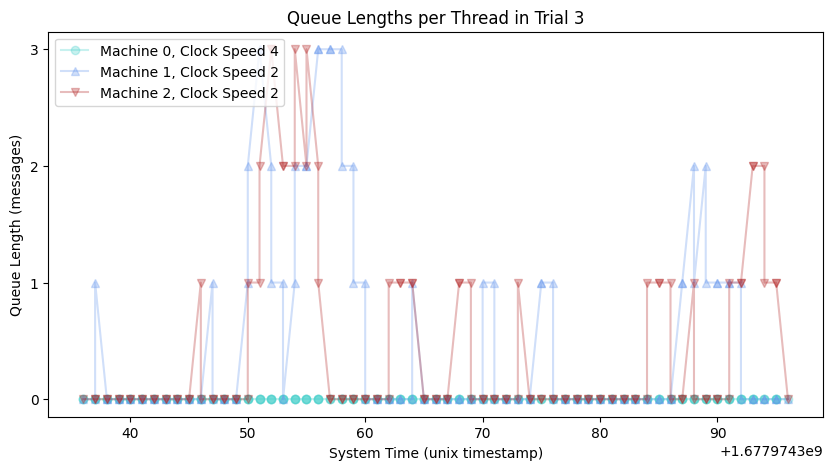

In [12]:
plot_lclock_deltas(hp_t3_m0_c4, hp_t3_m1_c2, hp_t3_m2_c2, 4, 2, 2, 3)
plot_lclock_vs_systime(hp_t3_m0_c4, hp_t3_m1_c2, hp_t3_m2_c2, 4, 2, 2, 3)
plotQueueLengths(hp_t3_m0_c4, hp_t3_m1_c2, hp_t3_m2_c2, 4, 2, 2, 3)

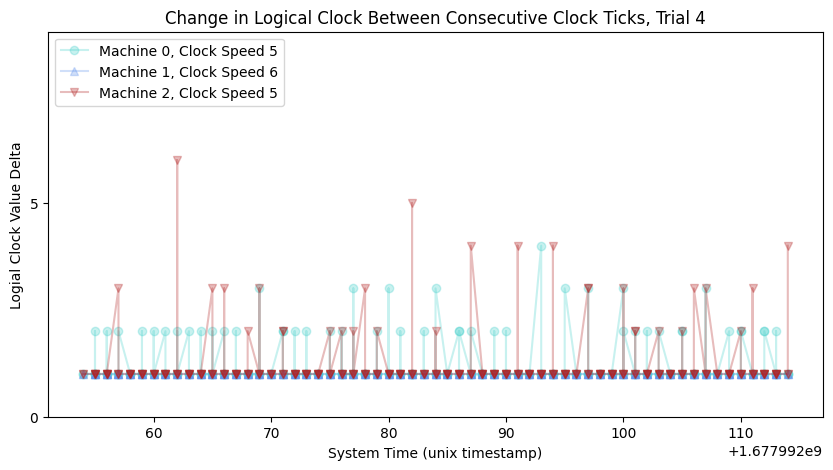

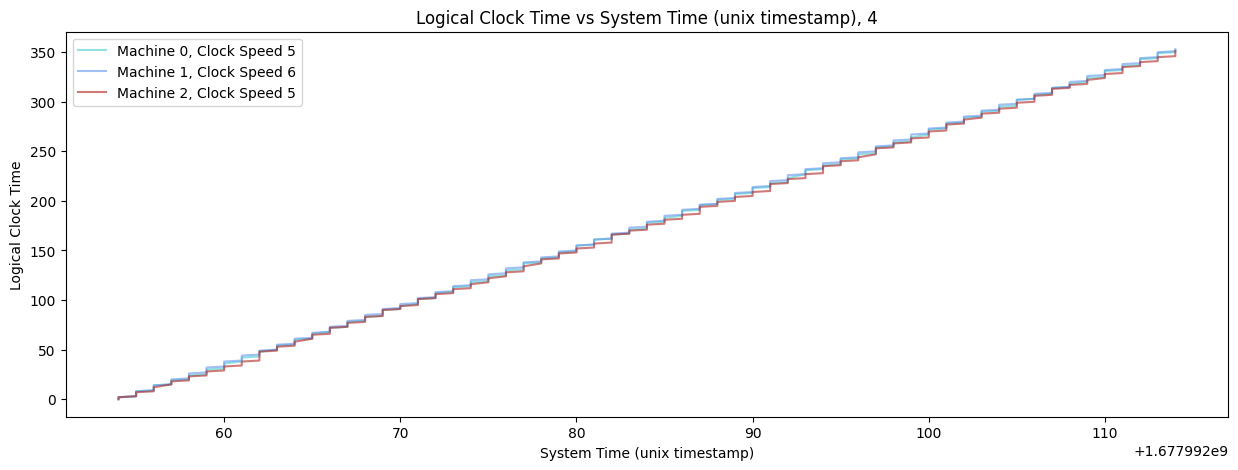

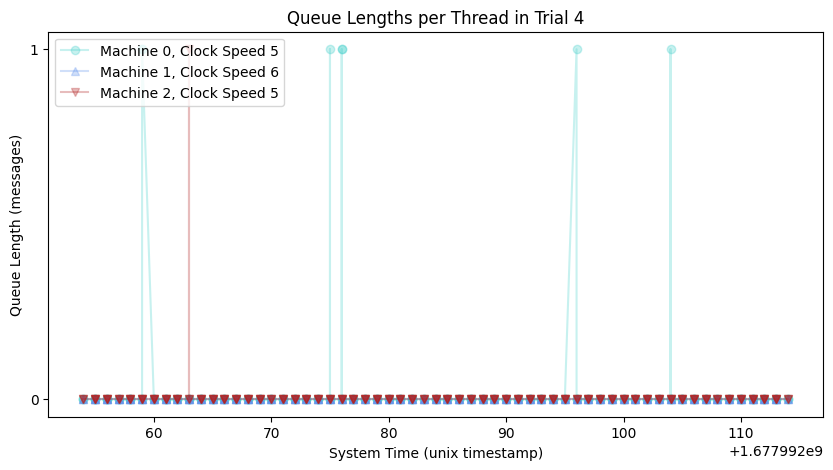

In [13]:
plot_lclock_deltas(hp_t4_m0_c5, hp_t4_m1_c6, hp_t4_m2_c5, 5, 6, 5, 4)
plot_lclock_vs_systime(hp_t4_m0_c5, hp_t4_m1_c6, hp_t4_m2_c5, 5, 6, 5, 4)
plotQueueLengths(hp_t4_m0_c5, hp_t4_m1_c6, hp_t4_m2_c5, 5, 6, 5, 4)

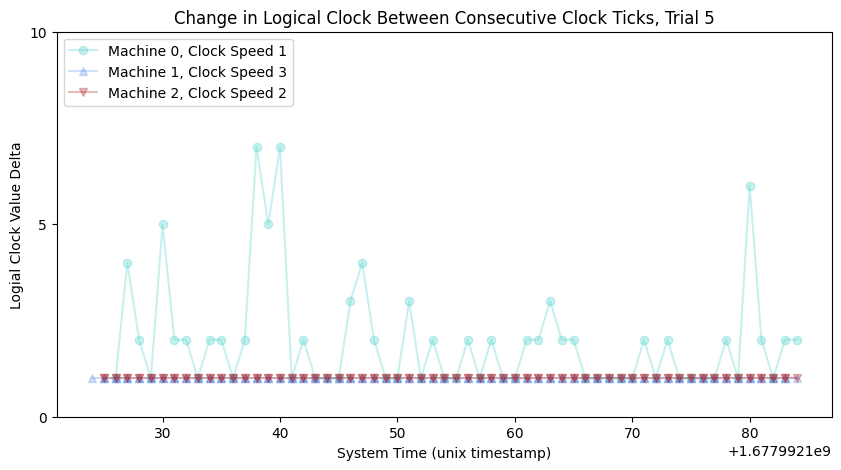

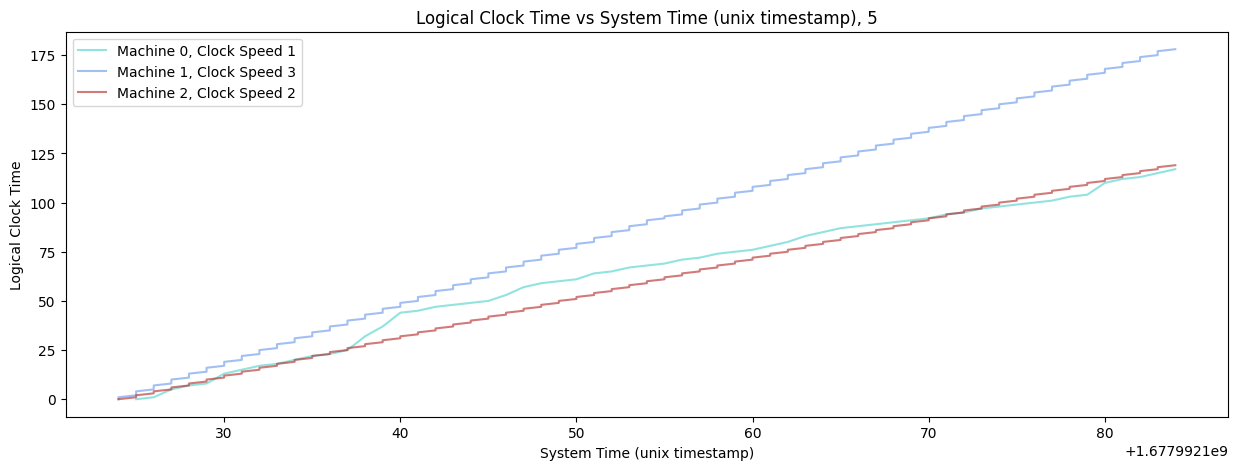

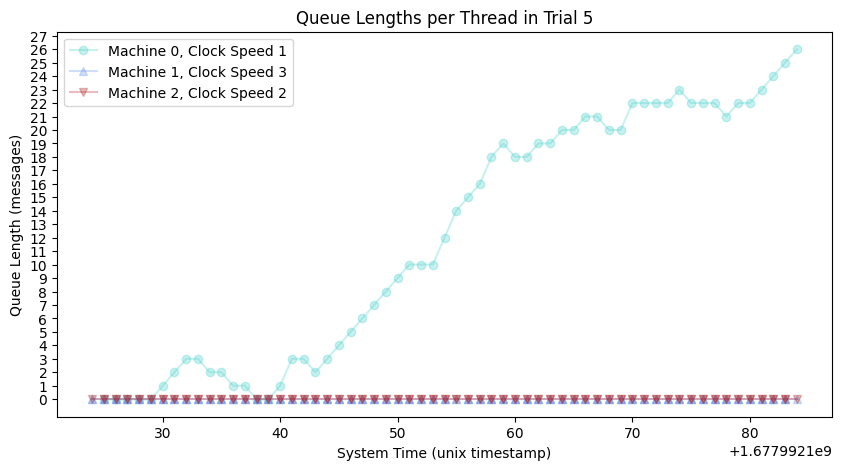

In [14]:
plot_lclock_deltas(hp_t5_m0_c1, hp_t5_m1_c3, hp_t5_m2_c2, 1, 3, 2, 5)
plot_lclock_vs_systime(hp_t5_m0_c1, hp_t5_m1_c3, hp_t5_m2_c2, 1, 3, 2, 5)
plotQueueLengths(hp_t5_m0_c1, hp_t5_m1_c3, hp_t5_m2_c2, 1, 3, 2, 5)

In [15]:
# Reading data for lower clock speed variation trials
cs_t1_m0_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial1/machine0clock_speed6log.csv')
cs_t1_m1_c5 = pd.read_csv('./lowerClockSpeedVariationTrials/trial1/machine1clock_speed5log.csv')
cs_t1_m2_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial1/machine2clock_speed6log.csv')

cs_t2_m0_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial2/machine0clock_speed6log.csv')
cs_t2_m1_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial2/machine1clock_speed6log.csv')
cs_t2_m2_c5 = pd.read_csv('./lowerClockSpeedVariationTrials/trial2/machine2clock_speed5log.csv')

cs_t3_m0_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial3/machine0clock_speed6log.csv')
cs_t3_m1_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial3/machine1clock_speed6log.csv')
cs_t3_m2_c6 = pd.read_csv('./lowerClockSpeedVariationTrials/trial3/machine2clock_speed6log.csv')

# cs_t4_m0_c5 = pd.read_csv('./higherSendProbabilityTrials/trial4/machine0clock_speed5log.csv')
# cs_t4_m1_c6 = pd.read_csv('./higherSendProbabilityTrials/trial4/machine1clock_speed6log.csv')
# cs_t4_m2_c5 = pd.read_csv('./higherSendProbabilityTrials/trial4/machine2clock_speed5log.csv')

# cs_t5_m0_c1 = pd.read_csv('./higherSendProbabilityTrials/trial5/machine0clock_speed1log.csv')
# cs_t5_m1_c3 = pd.read_csv('./higherSendProbabilityTrials/trial5/machine1clock_speed3log.csv')
# cs_t5_m2_c2 = pd.read_csv('./higherSendProbabilityTrials/trial5/machine2clock_speed2log.csv')

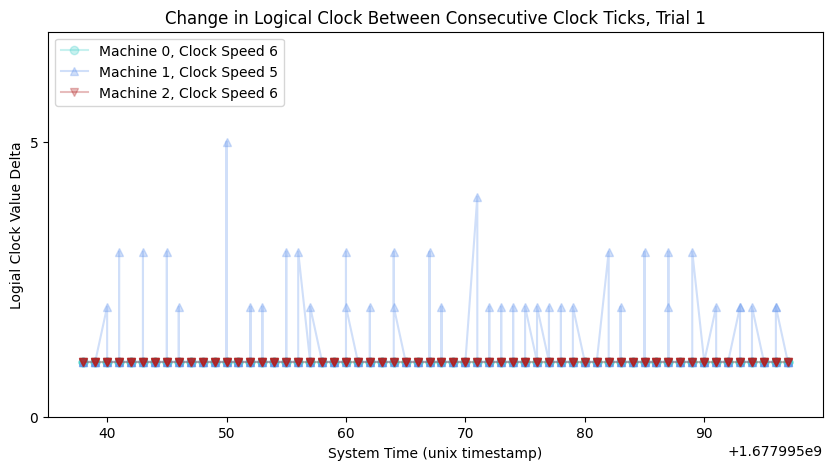

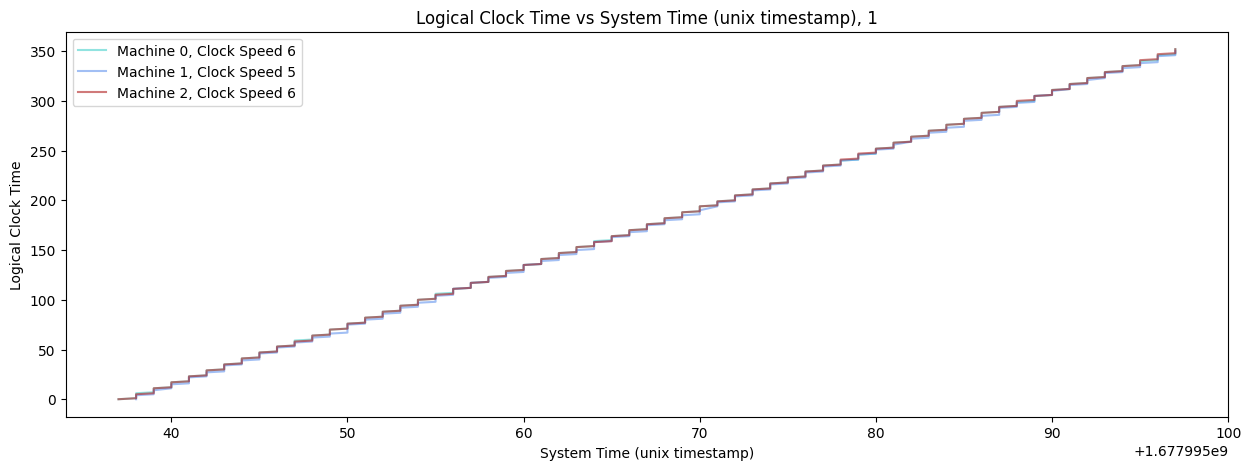

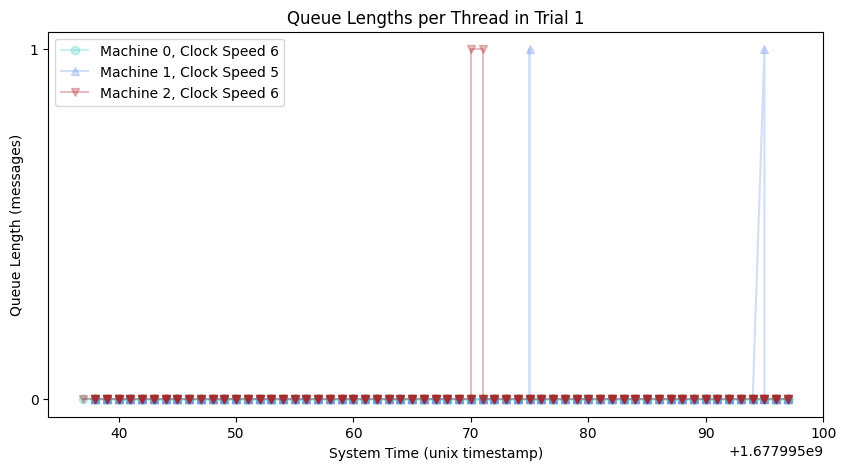

In [16]:
plot_lclock_deltas(cs_t1_m0_c6, cs_t1_m1_c5, cs_t1_m2_c6, 6, 5, 6, 1)
plot_lclock_vs_systime(cs_t1_m0_c6, cs_t1_m1_c5, cs_t1_m2_c6, 6, 5, 6, 1)
plotQueueLengths(cs_t1_m0_c6, cs_t1_m1_c5, cs_t1_m2_c6, 6, 5, 6, 1)

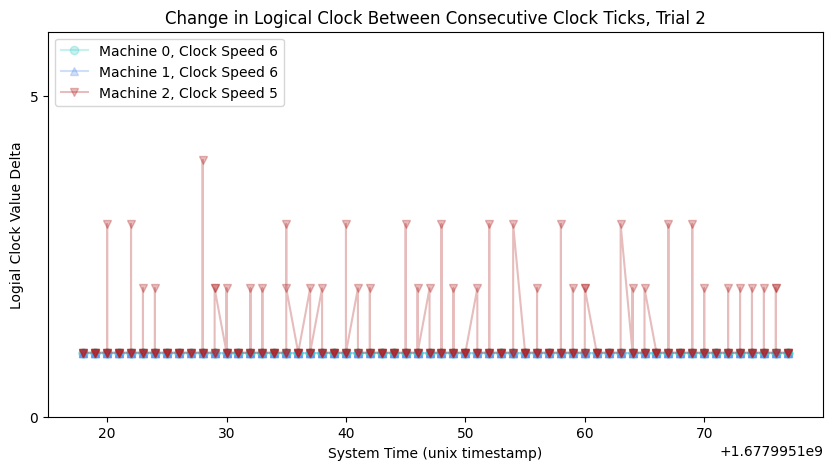

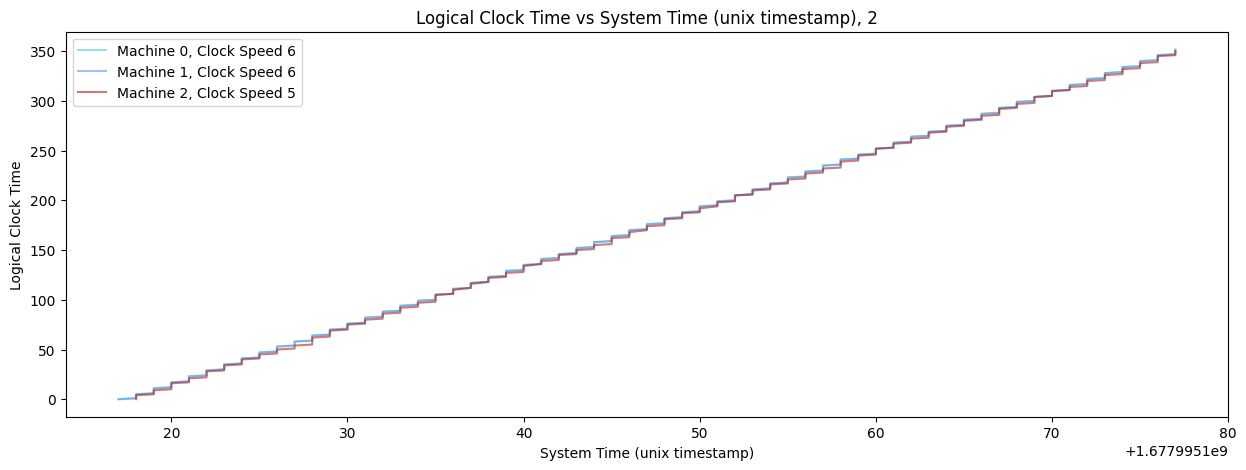

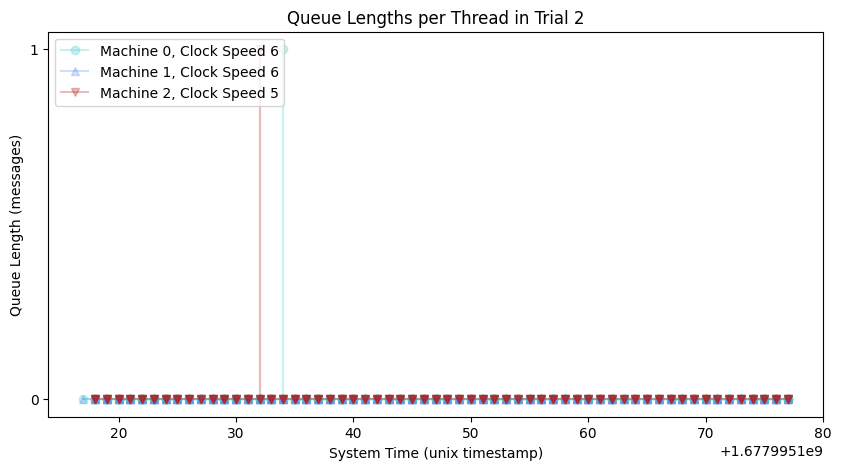

In [17]:
plot_lclock_deltas(cs_t2_m0_c6, cs_t2_m1_c6, cs_t2_m2_c5, 6, 6, 5, 2)
plot_lclock_vs_systime(cs_t2_m0_c6, cs_t2_m1_c6, cs_t2_m2_c5, 6, 6, 5, 2)
plotQueueLengths(cs_t2_m0_c6, cs_t2_m1_c6, cs_t2_m2_c5, 6, 6, 5, 2)

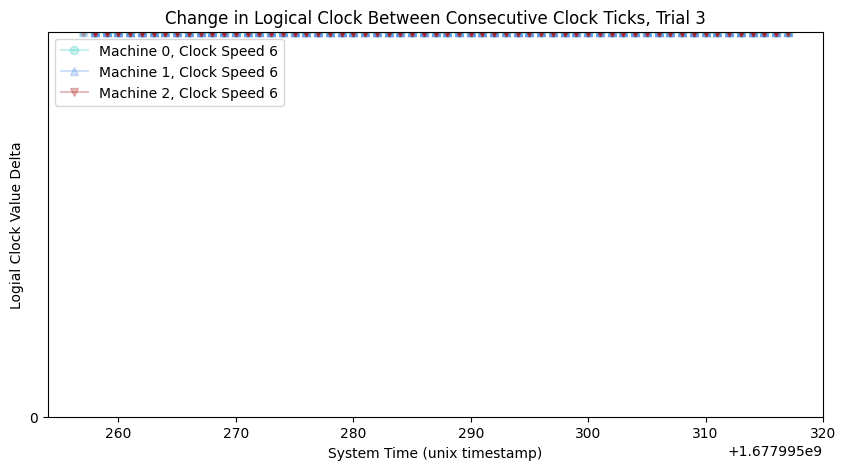

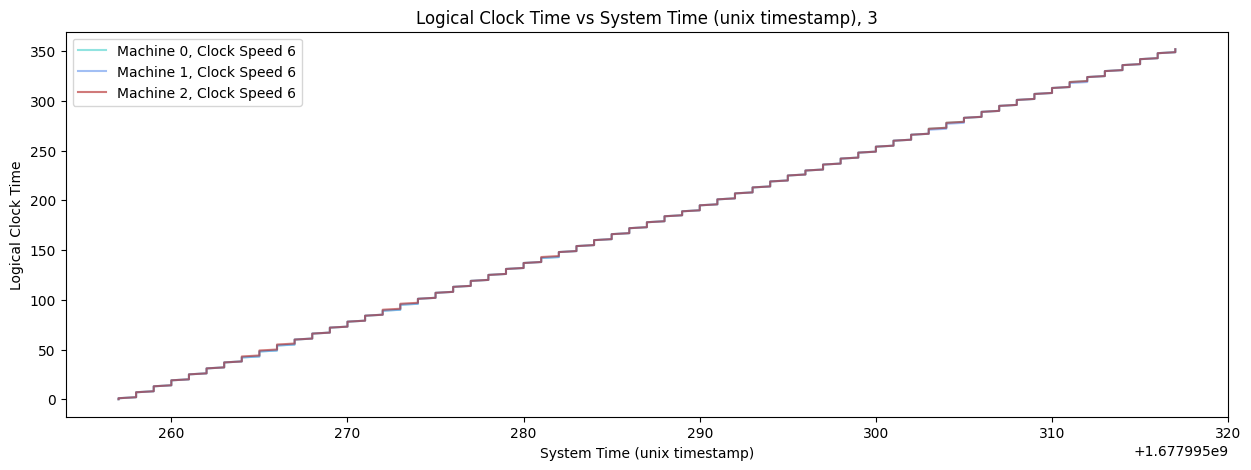

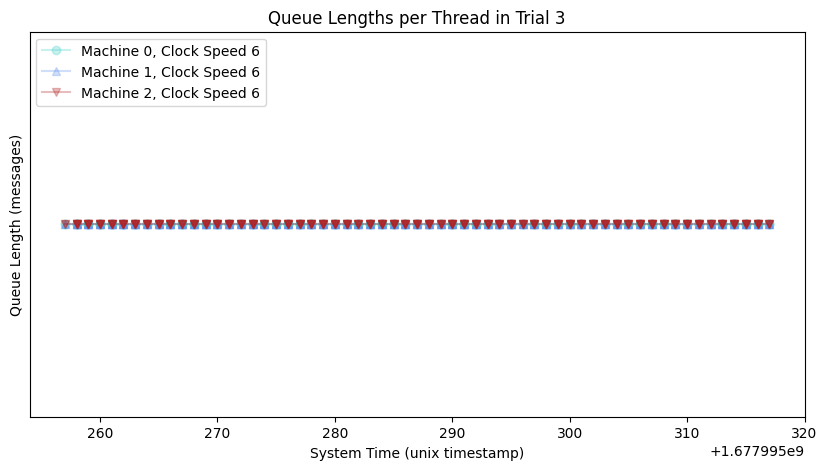

In [18]:
plot_lclock_deltas(cs_t3_m0_c6, cs_t3_m1_c6, cs_t3_m2_c6, 6, 6, 6, 3)
plot_lclock_vs_systime(cs_t3_m0_c6, cs_t3_m1_c6, cs_t3_m2_c6, 6, 6, 6, 3)
plotQueueLengths(cs_t3_m0_c6, cs_t3_m1_c6, cs_t3_m2_c6, 6, 6, 6, 3)